# Install Necessary Libraries

In [3]:
!pip install yfinance

  Obtaining dependency information for yfinance from https://files.pythonhosted.org/packages/7d/76/31fb9c58398f4cbdde4a0831d0407a1ca987fe828c7da9ce80969014a5a1/yfinance-0.2.40-py2.py3-none-any.whl.metadata
  Obtaining dependency information for multitasking>=0.0.7 from https://files.pythonhosted.org/packages/3e/8a/bb3160e76e844db9e69a413f055818969c8acade64e1a9ac5ce9dfdcf6c1/multitasking-0.0.11-py3-none-any.whl.metadata
  Obtaining dependency information for frozendict>=2.3.4 from https://files.pythonhosted.org/packages/6a/71/3656c00606e75e81f11721e6a1c973c3e03da8c7d8b665d20f78245384c6/frozendict-2.4.4-py311-none-any.whl.metadata
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
      --------------------------------------- 0.0/3.0 MB 991.0 kB/s eta 0:00:03
     - -------------------------------------- 0.1/3.0 MB 1.3 MB/s eta 0:00:03
     -- ------------------------------------- 0.2/3.0 MB 1.5 MB/s eta 0:00:02
     ----- ---------------------------------- 0.4/3.0 MB

In [5]:
import yfinance as yf
import pandas as pd
import os

Fetch data for the S&P 500 index

In [6]:
sp500 = yf.Ticker("^GSPC")

In [7]:
sp500 = sp500.history(period="max")

In [12]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2024-07-01 00:00:00-04:00,5471.080078,5479.549805,5446.529785,5475.089844,3488760000,0.0,0.0
2024-07-02 00:00:00-04:00,5461.839844,5509.689941,5458.430176,5509.009766,3329950000,0.0,0.0
2024-07-03 00:00:00-04:00,5507.439941,5539.270020,5507.419922,5537.020020,2179470000,0.0,0.0


In [13]:
sp500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2024-06-24 00:00:00-04:00', '2024-06-25 00:00:00-04:00',
               '2024-06-26 00:00:00-04:00', '2024-06-27 00:00:00-04:00',
               '2024-06-28 00:00:00-04:00', '2024-07-01 00:00:00-04:00',
               '2024-07-02 00:00:00-04:00', '2024-07-03 00:00:00-04:00',
               '2024-07-05 00:00:00-04:00', '2024-07-08 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=24244, freq=None)

Plot Historical Graph

<Axes: xlabel='Date'>

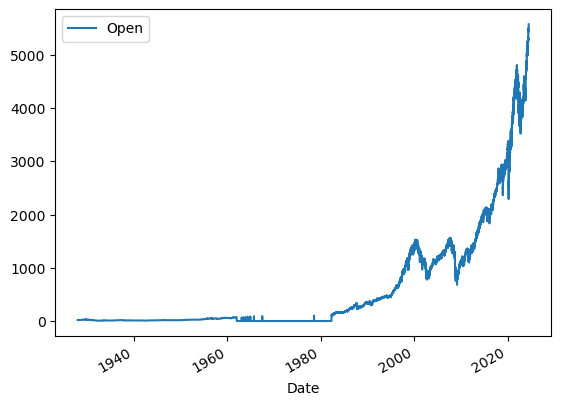

In [17]:
sp500.plot.line(y="Open",use_index=True)

<Axes: xlabel='Date'>

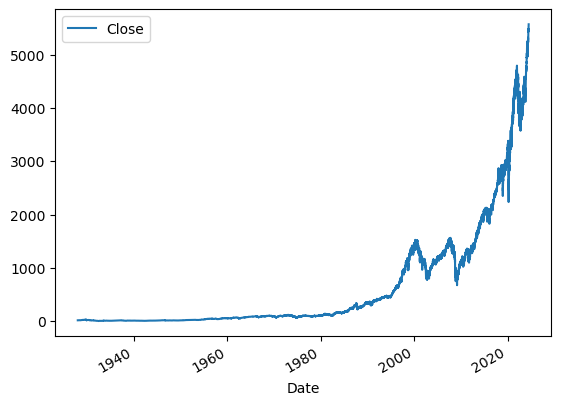

In [18]:
sp500.plot.line(y="Close",use_index=True)

Clean up data (Remove Unecessary Columns)

In [19]:
del sp500["Dividends"]
del sp500["Stock Splits"]

In [20]:
sp500.head()

,Open,High,Low,Close,Volume
Date,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0


Add next day stock price on each column

In [24]:
sp500["Next Day"] = sp500["Close"].shift(-1)

In [25]:
sp500

,Open,High,Low,Close,Volume,Next Day
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2024-07-01 00:00:00-04:00,5471.080078,5479.549805,5446.529785,5475.089844,3488760000,5509.009766
2024-07-02 00:00:00-04:00,5461.839844,5509.689941,5458.430176,5509.009766,3329950000,5537.020020
2024-07-03 00:00:00-04:00,5507.439941,5539.270020,5507.419922,5537.020020,2179470000,5567.189941


In [28]:
sp500["Target"] = (sp500["Next Day"] > sp500["Close"]).astype(int)

Remove data prior to 1990

In [29]:
sp500 = sp500.loc["1990-01-01":].copy()

In [30]:
sp500.head()

,Open,High,Low,Close,Volume,Next Day,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0


Train the model 

In [35]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

predictors = ["Close","Volume","Open","High","Low"]
model.fit(train[predictors],train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

Check model accuracy

In [36]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])

In [37]:
import pandas as pd
preds = pd.Series(preds, index=test.index)

In [39]:
precision_score(test["Target"],preds)

0.75

Create a combined plot of Target and Prediction

In [40]:
combined = pd.concat([test["Target"],preds],axis =1)

<Axes: xlabel='Date'>

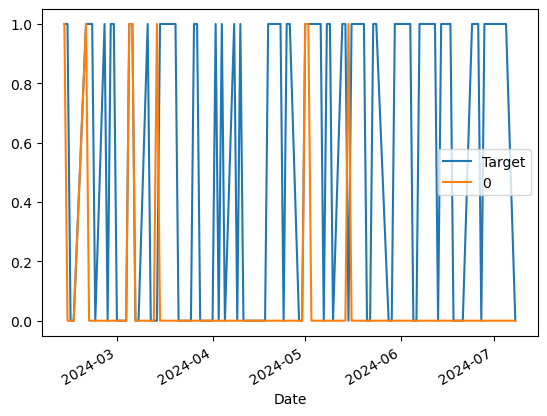

In [41]:
combined.plot()

Backtesting System

In [42]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [43]:

def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    
    return pd.concat(all_predictions)

In [44]:
predictions = backtest(sp500,model,predictors)
predictions["Predictions"].value_counts()

Predictions
0    3598
1    2596
Name: count, dtype: int64

In [45]:
precision_score(predictions["Target"],predictions["Predictions"])

0.5288906009244992

In [47]:
predictions["Target"].value_counts() / predictions.shape[0]

Target
1    0.535357
0    0.464643
Name: count, dtype: float64

In [54]:
horizons = [2,5,60,250,1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = sp500.rolling(horizon).mean()
    
    ratio_column = f"Close_Ratio_{horizon}"
    sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]
    
    trend_column = f"Trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]
    
    new_predictors+= [ratio_column, trend_column]
    

    

In [56]:
sp500 = sp500.dropna()

In [57]:
sp500

,Open,High,Low,Close,Volume,Next Day,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15 00:00:00-05:00,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16 00:00:00-05:00,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17 00:00:00-05:00,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20 00:00:00-05:00,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-28 00:00:00-04:00,5488.479980,5523.640137,5451.120117,5460.479980,7199220000,5475.089844,1,0.997954,1.0,0.998682,3.0,1.040500,34.0,1.140228,140.0,1.289110,529.0
2024-07-01 00:00:00-04:00,5471.080078,5479.549805,5446.529785,5475.089844,3488760000,5509.009766,1,1.001336,1.0,1.000358,4.0,1.042198,35.0,1.142306,140.0,1.291851,530.0
2024-07-02 00:00:00-04:00,5461.839844,5509.689941,5458.430176,5509.009766,3329950000,5537.020020,1,1.003088,2.0,1.005098,4.0,1.047643,35.0,1.148365,141.0,1.299142,530.0


In [58]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [59]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >=.6] = 1
    preds[preds <.6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [60]:
predictions = backtest(sp500, model, new_predictors)

In [61]:
predictions["Predictions"].value_counts()

Predictions
0.0    4355
1.0     838
Name: count, dtype: int64

In [62]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5751789976133651

In [63]:
sp500.to_csv("S&P500 Data",index = False)